# Estimação de Estados do Sistema Elétrico de Potência (EESEP)

O processo de Estimação de Estados pode ser **Dinâmico** ou **Estático**.

* **Estimador Dinâmico**
> As variações das grandezas no tempo são consideradas na modelagem da rede.


* **Estimador Estático**
> Considera o modelo de rede estático ("foto do sistema"), representado por equações algébricas não-lineares. É o tipo mais utilizado, devido ao baixo número de medidas e falta de sincronismo.


O Estimador de Estados é utilizado para cálculo das variáveis de estado desconhecidas por meio de um conjunto de medidas não exatas. Logo, o resultado obtido também não será exato.

O problema de estimação de estados consiste em encontrar uma forma de atingir a melhor estimativa das variáveis desconhecidas. O critério estatístico mais utilizado para isso é o de Mínimos Quadrados Ponderados (WLS, do inglês *Weighted Least Squares*. Este método funciona bem para erros Gaussianos, mas falha quando há um ou mais erros grosseiros (EG)

>**NOTA:** Uma medida é portadora de Erro Grosseiro quando apresenta grau de imprecisão muito maior do que é suposto no modelo de medição. Mais precisamente, uma medida possui EG se a mesma desvia do valor "verdadeiro" de, no mínimo, 3 vezes o desvio padrão.

Para superar essa limitação, métodos para detecção e identificação de EG foram desenvolvidos, sendo os mais utilizados baseados na análise estatística dos resíduos das medidas. Os resíduos fornecem informações úteis sobre eventuais violações das suposições feitas em relação ao modelo de medição.

### Resíduos das medidas

São as diferenças entre os valores estimados e aqueles medidos, dadas por:

$r = z - \hat{z}$
***
Diversos estimadores WLS com maior resíduo normalizado (WLS + $r^{N}$) foram aplicados em SEP, sendo os mais importantes:
* Estimador de Máximo Valor Absoluto Ponderado
* Estimador de Mínima Meadiana do Resíduo ao Quadrado

## Estimador de Estados Estático Linear por Mínimos Quadrados (LS)

Consideremos um sistema de 2 barras a seguir (modelo linear).


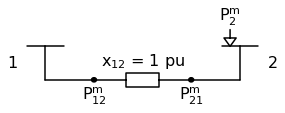

In [4]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()
d.add(e.VDD, lftlabel='1', zoom=3)
d.add(e.LINE, zoom=0.5)
d.add(e.DOT, botlabel='$P_{12}^{m}$')
d.add(e.RBOX, label='$x_{12}$ = 1 pu')
d.add(e.DOT, botlabel='$P_{21}^{m}$')
d.add(e.LINE, zoom=0.5)
B2 = d.add(e.VDD, rgtlabel='2', zoom=3)
d.add(e.GND_SIG, zoom=0.75, xy=[5.7,1.8], label='$P_{2}^{m}$')

d.draw()

* Variáveis de Estado: $\theta_{1}$, $\theta_{2}$
    * $\theta_{1}$ é definida como referência: $\theta_{1} = 0$


* Medidas: $P_{12}^{m}$, $P_{21}^{m}$ e $P_{2}^{m}$

>$m = 3 \rightarrow$ número de medidas

>$n = 2 \rightarrow$ número de barras

>$N = 1 \rightarrow$ número de variáveis de estado para estimar

### Modelo de Medição

Qualquer medida possui ruído inerente ao processo de medição.

$P_{12}^{m} = \underbrace{P_{12}^{v}}_\text{valor verdadeiro} + \underbrace{\omega_{P_{12}}}_\text{ruído}$

A equação do fluxo de potência linear é dada por:

$P_{km} = \frac{\theta_{k} - \theta_{l}}{x_{km}}$

Logo:

$
\begin{cases}
P_{12}^{m} = \frac{\theta_{1} - \theta_{2}}{x_{12}} + \omega_{P_{12}}\\
\\
P_{21}^{m} = \frac{\theta_{2} - \theta_{1}}{x_{12}} + \omega_{P_{21}} \\
\\
P_{2}^{m} = \frac{\theta_{2} - \theta_{1}}{x_{12}} + \omega_{P_{2}}
\end{cases}
$

Na forma matricial, o sistema pode ser reescrito como:

$
\begin{bmatrix}
P_{12}^{m} \\
P_{21}^{m} \\
P_{2}^{m}
\end{bmatrix}
=
\begin{bmatrix}
1 & -1 \\
-1 & 1 \\
-1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_{1} \\
\theta_{2}
\end{bmatrix}
+
\begin{bmatrix}
\omega_{P_{12}} \\
\omega_{P_{21}} \\
\omega_{P_{2}}
\end{bmatrix}
\leftrightarrow
z = Hx^{v} + \omega
$

onde:

$z \rightarrow$ vetor de medidas $(m\times 1)$

$H \rightarrow$ Jacobiana que relacionas medidas e variáveis de estado $(m\times n)$

$x^{v} \rightarrow$ vetor de variáveis de estado verdadeiras $(n\times 1)$

$\omega \rightarrow$ vetor de ruídos $(m\times 1)$


Os erros das medidas são considerados como variáveis aleatórias independentes, com distribuição Gaussiana de média zero e variância conhecida.

### Método dos Mínimos Quadrados (LS)

O Método dos Mínimos Quadrados minimiza a soma dos quadrados das diferenças entre o valor medido e o estimado. A partir do estimador LS, a estimativa do vetor $x^{v}$, designado por $\hat{x}$, é obtida determinando o valor de x que torna mínimo o índice $J(x)$, dado por:

$
\begin{array}[ccccc]
JJ(x) & = & \displaystyle\sum_{i=1}^{m} \omega_{i}^{2} & = & \omega^{T}\cdot\omega \\
\\
 & & & = & (z - Hx)^{T}(z - Hx) \\
\\
 & & & = & z^{T}z - z^{T}Hx - x^{T}H^{T}z + x^{T}H^{T}Hx
\end{array}
$

Tem-se que:

$
z^{T}Hx = x^{T}H^{T}z \rightarrow escalar
$

Logo:

$
J(x) = z^{T}z - 2z^{T}Hx + x^{T}H^{T}Hx
$

> #### Minimizando $J(x)$
>
> Como estamos minimizando, x vira $\hat{x}$ (valor estimado).
>
>$
\frac{\partial J(x)}{\partial x} = 0 - 2H^{T}z + 2H^{T}H\hat{x} = 0 \Rightarrow \\
\\
\Rightarrow \hat{x} = (H^{T}H)^{-1}\cdot H^{T}z = G^{-1}H^{T}z
$

## Estimador de Estados Estático Linear por Mínimos Quadrados Ponderados (WLS)

Pondera as medidas de acordo com a precisão dos respectivos medidores.

**Hipótese 1:** Considera-se que os erros das medidas são Gaussianos (seguem uma distribuição normal).


### Distribuição Normal

Definida pela seguinte Função Densidade de Probabilidade:

$
f(\omega_{i}) = \frac{1}{\sigma_{i}\sqrt{2\pi}}e^{(\omega_{i} - \mu_{i})^{2}/2\sigma_{i}^{2}}
$

onde:

$\mu_{i} \rightarrow$ média

$\sigma_{i} \rightarrow$ desvio padrão

$\sigma_{i}^{2} \rightarrow$ variância

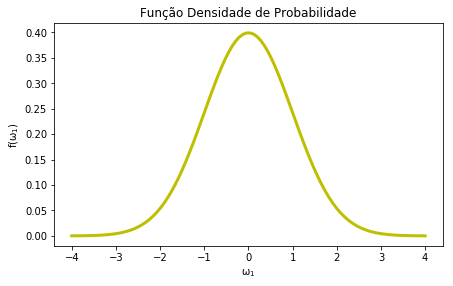

In [2]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0., 1.
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
bins = np.linspace(-4,4,100)

# Plot the distribution curve
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)), linewidth=3, color='y')
plt.title('Função Densidade de Probabilidade')
plt.xlabel('$\omega_{1}$')
plt.ylabel('$f(\omega_{1})$')
plt.show()

Em EESEP, $\mu_{i}$ é zero (caso o medidor não esteja polarizado, ou seja, não possui erro sistemático) e $\sigma_{i}^{2}$ é conhecida.

Quanto menor é o valor de $\sigma_{i}^{2}$, melhor é a medida. Consequentemente, o peso (ponderação) mais utilizado é o inverso da variância do erro, $\frac{1}{\sigma_{i}^{2}}$.

Considerando esta ponderação, $J(x)$ torna-se:

$
J(x) = \displaystyle\sum_{i=1}^{m}\left(\frac{\omega_{i}}{\sigma_{i}}\right)^{2} = \omega_{i}^{T}\cdot W\cdot\omega_{i}
$

onde:

$W \rightarrow$ matriz de ponderação. É a inversa da matriz de covariância dos erros das medidas. Esta é uma matriz diagonal.

### Modelo Linear Ponderado

$
z = Hx^{v} + \omega \Rightarrow \omega = z - Hx^{v}
$

$
J(x) = (z - Hx)^{T}\cdot W \cdot (z - Hx)
$

Considerando $W = W^{1/2}\cdot W^{1/2}:$

$
J(x) = (z - Hx)^{T}\cdot W^{1/2}\cdot W^{1/2} \cdot (z - Hx)
$

$
J(x) = (\underbrace{W^{1/2}z}_{\tilde{z}} - \underbrace{W^{1/2}H}_{\tilde{H}}x)^{T}\cdot (W^{1/2}z - W^{1/2}Hx)
$

$
J(x) = (\tilde{z} - \tilde{H}x)^{T} \cdot (\tilde{z} - \tilde{H}x)
$

Por analogia com o modelo sem ponderação:

$
\hat{x} = (\tilde{H}^{T}\tilde{H})^{-1}\tilde{H}^{T}\tilde{z} = {\underbrace{(H^{T}WH)}_{G}}^{-1}H^{T}Wz
$

>**NOTA:** Um vetor muito importante para o processo de EESEP é o vetor de resíduos de estimação $(r)$ que é a diferença entre os valores medido e estimado.

>$r = z - \hat{z} = z - H\hat{x}$

***

**Exemplo:** analisando a precisão de medidores.

$
z^{v} = 
\begin{bmatrix}
P \\
V
\end{bmatrix}
=
\begin{bmatrix}
1 \\
1
\end{bmatrix}
$

$
W =
\begin{bmatrix}
1 & 0 \\
0 & 10
\end{bmatrix}
$

* Para a medida de potência: $\frac{1}{\sigma_{P}^{2}} = 1 \Rightarrow \sigma_{P} = 1$:

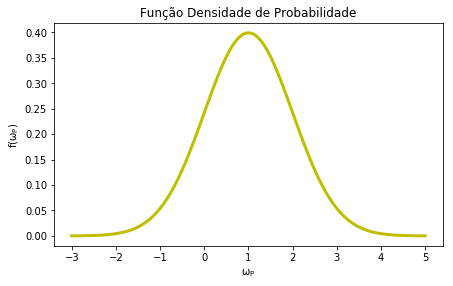

In [3]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 1., 1.
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
bins = np.linspace(-3,5,100)

# Plot the distribution curve
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)), linewidth=3, color='y')
plt.title('Função Densidade de Probabilidade')
plt.xlabel('$\omega_{P}$')
plt.ylabel('$f(\omega_{P})$')
plt.show()

* Para a medida de potência: $\frac{1}{\sigma_{V}^{2}} = 10 \Rightarrow \sigma_{P} = \sqrt{\frac{1}{10}} \approx 0,32$:

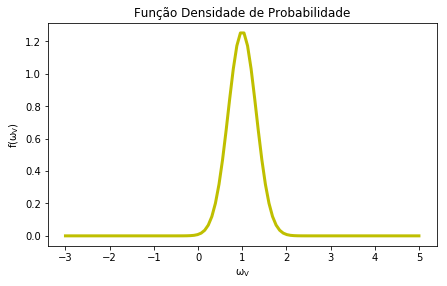

In [4]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 1., 1/np.sqrt(10.)
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
bins = np.linspace(-3,5,100)

# Plot the distribution curve
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)), linewidth=3, color='y')
plt.title('Função Densidade de Probabilidade')
plt.xlabel('$\omega_{V}$')
plt.ylabel('$f(\omega_{V})$')
plt.show()

Para este exemplo, aceitam-se valores para potência entre $-2$ e $4 \ pu$ e, para tensão, entre $0,04$ e $1,96 \ pu$.

***

## Distribuição Normal (ou Gaussiana)

> **Notação:** $X \sim N(\mu_{x}, \sigma_{x}^{2})$

Para calcular a probabilidade de $x$ assumir valores entre $x_{0}$ e $x_{1}$, é necessário o cálculo da seguinte integral:

$
P(x_{0} \leq x \leq x_{1}) = \displaystyle\int_{x_{0}}^{x_{1}} \frac{1}{\sigma_{x}\sqrt{2\pi}}e^{-(x-\mu_{x})^{2}/2\sigma_{x}^{2}}dx
$

Para uma variável aleatória $z \sim N(0, 1)$, isto é, para uma distribuição normal padrão (ou padronizada), calculou-se a probabilidade de

$
P(0 \leq z \leq z_{0}) = \displaystyle\int_{0}^{z_{0}} f(z)dz
$

para diversos valores de z_{0}, formando uma tabela. Assim, a obtenção da probabilidade de z se encontrar entre $z_{1}$ e $z_{2}$ é obtida calculando, com auxílio da tabela, a seguinte expressão:

$
P(z_{1} \leq z \leq z_{2}) = P(0 \leq z \leq z_{2}) - P(0 \leq z \leq z_{1})
$

Entretanto, em muitos casos não se tem uma população com média 0 e variância 1. Porém, um elemento $x$ de uma distribuição normal $N(\mu_{x}, \sigma_{x}^{2})$ pode ser padronizado da seguinte forma:

$
z = \frac{x - \mu_{x}}{\sigma_{x}}
$

sendo $z \sim N(0, 1)$.

***

**Exemplo:** Determinar a probabilidade de que uma variável aleatória $x \sim N(\mu_{x}, \sigma_{x}^{2})$ assuma os seguintes valores:


$
\begin{cases}
x \geq \mu_{x} + 2\sigma_{x} \\
ou \\
x \leq \mu_{x} - 2\sigma_{x}
\end{cases}
$

>*Padronização*
>
>$
x \geq \mu_{x} + 2\sigma_{x} \Rightarrow z \geq \frac{(\mu_{x} + 2\sigma_{x}) - \mu_{x}}{\sigma_{x}} \Rightarrow z \geq 2
$
>
>$
x \leq \mu_{x} + 2\sigma_{x} \Rightarrow z \leq -2
$

Pela tabela da normal padronizada:

$
P(z \leq -2) = P(z \geq 2) = 0,5 - P(o \leq z \leq 2) = 0,5 - 0,4772 \Rightarrow P(z \geq 2) = 0,0228
$

Assim:

$
P(z \leq -2) + P(z \geq 2) = P(x \leq \mu_{x} - 2\sigma_{x}) + P(x \geq \mu_{x} + 2\sigma_{x}) = 0,0456
$



## Revisão de Estatística

### Variável Aleatória (*va*)

É uma função que associa números reais aos eventos de um espaço amostral ($\Omega$).

Considere então um experimento que pode ser realizado diversas vezes onde um conjunto de resultados $\epsilon$ é gerado. Todos os resultado possíveis de ocorrer, em um evento sujeito às leis do acaso, constituem $\Omega$.
 
***
**Exemplo:** Lançamento de um dado.
 
$
\Omega = {1,2,3,4,5,6}
$

$
\textit{va} \rightarrow X = resultado \ do \ lançamento
$

***

As *va*'s podem ser discretas ou contínuas:

* *VA* Contínua: É aquela que, teoricamente, pode assumir qualquer valor num certo intervalo razoávelde variação. Usualmente resultante de um processo de medição.

* *VA* Discreta: Ao contrário da contínua, assume valores pertencentes a um conjunto enumerado. Usualmente resultante de um processo de contagem.

### Distribuição de Probabilidade

Descreve o comportamento de uma *va*. Para *va*'s discretas, a distribuição de probabilidade pode ser caracterizadapor uma função probabilidade que indica diretamente as probabilidades asociadas a cada valor.

Para *va*'s contínuas, a distribuição de probabilidade é caracterizada pela função densidade de probabilidade, que é uma função contínua.

### Esperança Matemática (Valor Esperado ou Espectância)

O valor esperado de uma *va* $x$ é o valor médio de $X$ ponderado pela correspondente função de probabilidade. Ele representa o valor médio esperado de um experimento se ele for repetido muitas vezes. Observe que o valor em si pode não ser esperado no sentido geral, podendo ser improvável ou impossível.

Se todos os eventos tiverem igual probabilidade, o valor esperado será a média aritmética.

$
x \sim N(\mu_{x}, \sigma_{x}^{2})
$

$
E\{x\} = \int_{-\infty}^{\infty} x\cdot f_{dp}(x)dx \Rightarrow E\{x\} = \bar{x} = \mu_{x}
$

### Variância ($\sigma_{x}^{2}$)

É a média dos quadrados das diferenças entre os valores e sua média.

$
\sigma_{x}^{2} = E\{(x - \bar{x})^{2}\}
$

$
\sigma_{x} = \sqrt{\sigma_{x}^{2}}
$

### Algumas Propriedades de $E\{x\}$

Sendo $x \sim N(\mu_{x}, \sigma_{x}^{2})$ e $a$ e $k$ determinísticos (constantes e sem incertezas):

* $
E\{k\} = k \ e \ \sigma_{k}^{2} = 0
$


* $
y = a\cdot x \\
E\{y\} = \bar{y} = E\{a\cdot x\} = E\{a\}\cdot E\{x\} = a \cdot \bar{x}
$


* $
y = x - k \\
E\{y\} = E\{x - k\} = E\{x\} - E\{k\} = \bar{x} - k
$


* $
y = \frac{x - \mu_{x}}{\sigma_{x}} \\
E\{y\} = E\{\frac{x - \mu_{x}}{\sigma_{x}}\} = \frac{E\{x\}}{\sigma_{x}} - \frac{\mu_{x}}{\sigma_{x}} = \frac{\mu_{x}}{\sigma_{x}} - \frac{\mu_{x}}{\sigma_{x}} = 0 \\
\sigma_{y}^{2} = E\{(y - \bar{y})^2\} = E\{(y - 0)^2\} = E\{(\frac{x - \mu_{x}}{\sigma_{x}})^2\} = \frac{E\{(x - \mu_{x})^2\}}{\sigma_{x}^{2}} = \frac{\sigma_{x}^{2}}{\sigma_{x}^{2}} = 1
$

### Vetores de Variáveis Aleatórias

$
x = [x_{1}, x_{2}, \cdots, x_{n}]^T, \ sendo \ x_{i} \ \textit{va} \ \forall \ i \in [1, n]
$

$
\bar{x} = E\{x\} = [\bar{x_{1}}, \bar{x_{2}}, \cdots, \bar{x_{n}}]^{T}
$

### Matriz Covariância

A matriz Covariância de $x$ é obtida da seguinte forma:

$
Cov\{x\} = E\{(x-\bar{x})^{2}\} = E\{(x-\bar{x})\cdot(x-\bar{x})^T\} \Rightarrow
$

$
\Rightarrow
Cov\{x\} = E\begin{Bmatrix}
    \begin{bmatrix}
        (x_{1} - \bar{x_{1}}) \\
        (x_{2} - \bar{x_{2}}) \\
        \vdots \\
        (x_{n} - \bar{x_{n}}) \\
    \end{bmatrix} \cdot 
    \begin{bmatrix}
        (x_{1} - \bar{x_{1}}) & (x_{2} - \bar{x_{2}}) & \cdots & (x_{n} - \bar{x_{n}})
    \end{bmatrix}
\end{Bmatrix}
\Rightarrow
$

$
\Rightarrow
Cov\{x\} = 
\begin{bmatrix}
    E\{(x_{1} - \bar{x_{1}})^{2}\} & \cdots & E\{(x_{1} - \bar{x_{1}})(x_{i} - \bar{x_{i}})\} & \cdots & E\{(x_{1} - \bar{x_{1}})(x_{n} - \bar{x_{n}})\} \\
     & \ddots & & & \\
     & & E\{(x_{i} - \bar{x_{i}})^{2}\} & & \\
     & & & \ddots & \\
     & & & & E\{(x_{n} - \bar{x_{n}})^{2}\} \\
\end{bmatrix}
$

, onde os elementos na diagonal principal são as variâncias e os demais são as covâriancias.

Se existirem elementos fora da diagonal principal, significa que as $\textit{va}$'s correspondentes têm alguma correlação, ou seja, não são $\textit{va}$'s independentes. Em EESEP, usualmente considera-se que a matrix covariância das medidas é diagonal.

***

> Seja $z$ um vetor aleatório e $Cov\{z\}$ sua matriz covariância. Logo:

> $Cov\{z\} = E\{(z-\bar{z})(z-\bar{z})^T\}$

> Seja ainda $A$ uma matriz determinística e $Y = Az$, determine $\bar{Y}$ e $Cov\{Y\}$.

> $\bar{Y} = E\{Y\} = E\{Az\} = A\cdot E\{z\} = A\bar{z}$

> $Cov\{Y\} = E\{(Y - \bar{Y})(Y - \bar{Y})^T\} = E\{(Az - A\bar{z})(Az - A\bar{z})^T\} \Rightarrow$

> $\Rightarrow Cov\{Y\} = E\{A(z - \bar{z})(z - \bar{z})^T A^T\} = A\cdot E\{(z - \bar{z})(z - \bar{z})^T\}\cdot A^T \Rightarrow$

> $\Rightarrow Cov\{Y\} = A\cdot Cov\{z\} \cdot A^T$

## Estimador de Estados Estático por WLS Tradicional

### Modelo de Medição

$
\underbrace{z}_\textit{va} = \underbrace{H}_\text{Determinístico (Hip.)} \cdot \underbrace{x^{v}}_\text{Determinístico} + \underbrace{\omega}_\textit{va} 
$

Por hipótese, $\omega_{i} \sim N(0, \sigma_{i}^{2})$ desde que não haja EG.

### Índice $J(x)$

$
J(x) = \omega^{T} \cdot W \cdot \omega
$

, onde $W$ é a matriz de ponderação, que é igual ao inverso da matriz de convariância dos ruídos.

$
W = \begin{bmatrix}
    \frac{1}{\sigma_{z_{1}}^{2}} & & & & \\
     & \ddots & & 0 & \\
     & & \frac{1}{\sigma_{z_{i}}^{2}} & & \\
     & 0 & & \ddots & \\
     & & & & \frac{1}{\sigma_{z_{n}}^{2}}
\end{bmatrix}
$

$
min \ J(x) \rightarrow \hat{x}
$

$
\hat{x} = (H^T W H)^{-1}H^T W z
$

$
E\{z\} = E\{Hx^{v} + \omega\} = E\{Hx^{v}\} + E\{\omega\} = E\{Hx^{v}\} = Hx^{v} = z^{v}
$

$
Cov\{z\} = E\{(z-\bar{z})(z-\bar{z})^T\} = E\{(z-Hx^{v})(z-Hx^{v})^T\} = E\{\omega \cdot \omega^T\} \Rightarrow \\
\Rightarrow Cov\{z\} = Cov\{\omega\} = W^{-1}
$

$
E\{\hat{x}\} = E\{\underbrace{(H^T W H)^{-1}H^T W}_{\Gamma} z\} = \Gamma E\{z\} = \Gamma H x^{v} = (H^T W H)^{-1}(H^T W H) x^{v} = I x^{v} = x^{v}
$

O valor esperado do vetor aleatório $\hat{x}$ é igual ao estado verdadeiro.

$
Cov\{\hat{x}\} = Cov\{\Gamma z\} = \Gamma \cdot Cov\{z\}\cdot \Gamma^T = (H^T W H)^{-1}H^T W \cdot W^{-1} \cdot [(H^T W H)^{-1}H^T W]^T \Rightarrow \\
\Rightarrow Cov\{\hat{x}\} = (H^T W H)^{-1}H^T W H(H^T W H)^{-1} = (H^T W H)^{-1} = G^{-1}
$

### Resíduo do EE WLS

$
r = z - \hat{z} = z - H\hat{x}
$

$
E\{r\} = E\{(z - H\hat{x})\} = E\{z\} - E\{H\hat{x}\} = Hx^{v} - Hx^{v} = 0
$

$
Cov\{r\} = Cov\{z - H\hat{x}\} = Cov\{z\} - HCov\{\hat{x}\} = W^{-1} - HG^{-1}H^T = \Omega
$

$
r = z - H\hat{x} = z - H(H^T W H)^{-1}H^T W z = (I - H(H^T W H)^{-1}H^T W)z = S\cdot z
$

, onde $S$ é a Matriz de Sensibiluidade do Resíduo.

### Resíduo Normalizado

$
r_{i}^{N} = \frac{r_{i} - \mu_{r_{i}}}{\sigma_{r_{i}}}, \ onde \ \sigma_{r_{i}} = \sqrt{\Omega_{ii}}
$

***

**Exemplo:** Calcular $r$ e $r^{N}$ para o circuito CC abaixo:

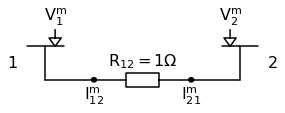

In [12]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()
d.add(e.VDD, lftlabel='1', zoom=3)
d.add(e.LINE, zoom=0.5)
d.add(e.DOT, botlabel='$I_{12}^{m}$')
d.add(e.RBOX, label='$R_{12} = 1 \Omega$')
d.add(e.DOT, botlabel='$I_{21}^{m}$')
d.add(e.LINE, zoom=0.5)
B2 = d.add(e.VDD, rgtlabel='2', zoom=3)
d.add(e.GND_SIG, zoom=0.75, xy=[5.7,1.8], label='$V_{2}^{m}$')
d.add(e.GND_SIG, zoom=0.75, xy=[.3,1.8], label='$V_{1}^{m}$')

d.draw()

$
z = \begin{bmatrix}
    I_{12}^{m} \\
    I_{21}^{m} \\
    V_{1}^{m} \\
    V_{2}^{m}
\end{bmatrix} = \begin{bmatrix}
    1,2 \\
    -0,9 \\
    0,2 \\
    -0,3
\end{bmatrix}
$

$
\hat{x} = \begin{bmatrix}
    0,21 \\
    -0,31
\end{bmatrix}
$

$
W^{-1} = \begin{bmatrix}
    1 & & & \\
     & 1 & & \\
     & & 0,01 & \\
     & & & 0,01
\end{bmatrix}
$

$
r = \begin{bmatrix}
    0,68 \\
    -0,39 \\
    -0,01 \\
    0,01
\end{bmatrix}
$

$
\Omega = \begin{bmatrix}
    0,98077 & & & \\
     & 0,98077 & & \\
     & & 0,0002 & \\
     & & & 0,0002
\end{bmatrix}
$

$
r^{N} = \begin{bmatrix}
    0,687 \\
    -0,384 \\
    -0,7627 \\
    0,7627
\end{bmatrix}
$